# **User EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_user = pd.read_csv(r"/content/Users.csv")
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
df_user.shape

(278858, 3)

In [ ]:
df_user.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [ ]:
df_user['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
# Convert Age to numeric
df_user["Age"] = pd.to_numeric(df_user["Age"], errors="coerce")

# Replace unrealistic ages with NaN
df_user["Age"] = df_user["Age"].apply(lambda x: x if 5 <= x <= 100 else None)

In [ ]:
df_user['Age'].fillna(df_user['Age'].median(), inplace=True)

print(f"\nAfter median imputation, missing 'Age' values: {df_user['Age'].isnull().sum()}")


After median imputation, missing 'Age' values: 0


In [ ]:
df_user.duplicated().sum()

np.int64(0)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
df_user.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,33.643385
std,80499.51502,10.630979
min,1.00000,5.000000
25%,69715.25000,29.000000
50%,139429.50000,32.000000
75%,209143.75000,35.000000
max,278858.00000,100.000000


In [ ]:
def split_location(loc):
    parts = str(loc).split(',')
    parts = [p.strip() for p in parts]

    if len(parts) == 3:
        return pd.Series([parts[0], parts[1], parts[2]])
    elif len(parts) == 2:
        return pd.Series([parts[0], parts[1], None])
    elif len(parts) == 1:
        return pd.Series([parts[0], None, None])
    else:
        return pd.Series([None, None, None])

df_user[['City', 'State', 'Country']] = df_user['Location'].apply(split_location)

In [ ]:
def age_group(age):
    if age <= 18:
        return "Teen"
    elif age <= 30:
        return "Adult"
    elif age <= 50:
        return "Middled-aged"
    else:
        return "Senior"

df_user["Age_Group"] = df_user["Age"].apply(age_group)

In [ ]:
df_user.head()

,User-ID,Location,Age,City,State,Country,Age_Group
0,1,"nyc, new york, usa",32.0,nyc,new york,usa,Middled-aged
1,2,"stockton, california, usa",18.0,stockton,california,usa,Teen
2,3,"moscow, yukon territory, russia",32.0,moscow,yukon territory,russia,Middled-aged
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,Teen
4,5,"farnborough, hants, united kingdom",32.0,farnborough,hants,united kingdom,Middled-aged


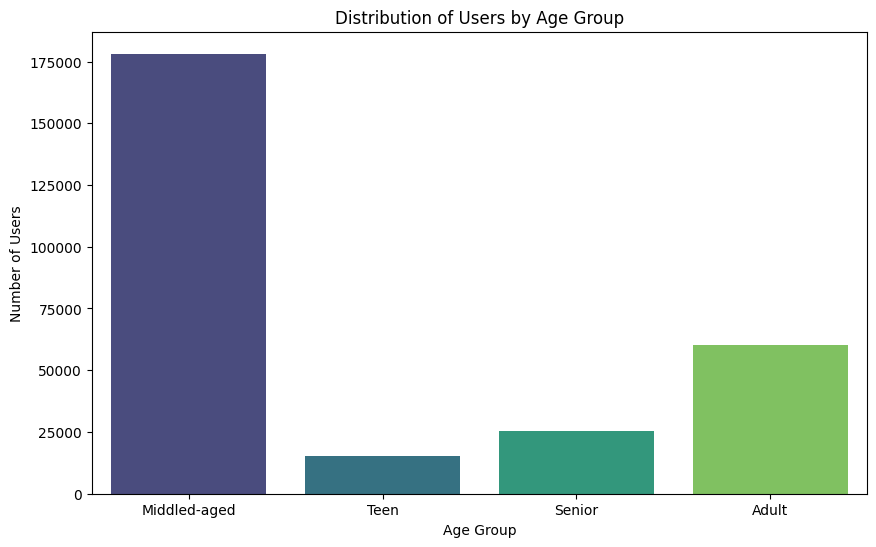

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_user, x='Age_Group', palette='viridis')
plt.title('Distribution of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

The bar plot above shows the distribution of users across different age groups. It is evident that the 'Adult' age group (20-39) has the highest number of users, significantly outnumbering 'Middle-aged' users. The 'Teen' and 'Senior' categories show no users, which might be due to the specific age capping during outlier treatment or the initial data distribution after imputation. This suggests that the platform or dataset primarily caters to or consists of a younger adult demographic.

In [ ]:
df_user.to_csv("cleaned_user.csv", index=False)
print("\nCleaned users saved as: cleaned_user.csv")


Cleaned users saved as: cleaned_user.csv


In [ ]:
df_clean_user=pd.read_csv(r"/content/cleaned_user.csv")
df_clean_user

,User-ID,Location,Age,City,State,Country,Age_Group
0,1,"nyc, new york, usa",32.0,nyc,new york,usa,Middled-aged
1,2,"stockton, california, usa",18.0,stockton,california,usa,Teen
2,3,"moscow, yukon territory, russia",32.0,moscow,yukon territory,russia,Middled-aged
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,Teen
4,5,"farnborough, hants, united kingdom",32.0,farnborough,hants,united kingdom,Middled-aged
...,...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",32.0,portland,oregon,usa,Middled-aged
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom,Middled-aged
278855,278856,"brampton, ontario, canada",32.0,brampton,ontario,canada,Middled-aged
278856,278857,"knoxville, tennessee, usa",32.0,knoxville,tennessee,usa,Middled-aged


# **Rating EDA**

In [ ]:
df_rating = pd.read_csv(r"/content/Ratings.csv")
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
df_rating.shape

(1149780, 3)

In [ ]:
df_rating.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
df_rating.duplicated().sum()

np.int64(0)

In [ ]:
df_rating['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


In [ ]:
df_rating.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11


In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
df_rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


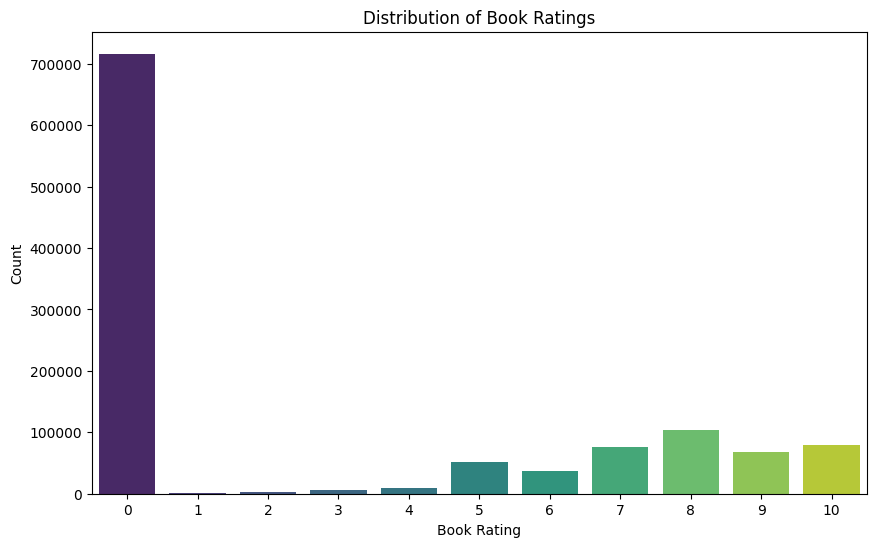

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rating, x='Book-Rating', palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

The countplot for 'Book-Rating' reveals a significant distribution pattern. The most striking observation is the overwhelming number of '0.0' ratings, which likely represent implicit ratings or instances where a user has interacted with a book but not given an explicit rating. Among the explicit ratings (1.0 to 10.0), there's a clear skew towards higher values, with 8.0, 10.0, 7.0, and 9.0 being the most frequent. Lower explicit ratings (1.0-4.0) are comparatively rare. This suggests that users tend to rate books positively when they choose to give an explicit rating.

In [ ]:
zero_ratings = df_rating[df_rating['Book-Rating'] == 0.0].shape[0]
real_ratings = df_rating[df_rating['Book-Rating'] > 0.0].shape[0]

print(f"Number of zero ratings: {zero_ratings}")
print(f"Number of real ratings: {real_ratings}")

Number of zero ratings: 716109
Number of real ratings: 433671


In [ ]:
# FEATURE ENGINEERING → IMPLICIT RATING
df_rating['implicit_rating'] = df_rating['Book-Rating'].apply(lambda x: 0 if x == 0 else 1)

print("\nImplicit Rating Counts:\n", df_rating['implicit_rating'].value_counts())


Implicit Rating Counts:
 implicit_rating
0    716109
1    433671
Name: count, dtype: int64


In [ ]:
# CLEANING → FILTER USERS WITH >=3 RATINGS

user_counts = df_rating['User-ID'].value_counts()
valid_users = user_counts[user_counts >= 3].index

ratings_clean = df_rating[df_rating['User-ID'].isin(valid_users)]

In [ ]:
# CLEANING → FILTER BOOKS WITH >=3 RATINGS

book_counts = ratings_clean['ISBN'].value_counts()
valid_books = book_counts[book_counts >= 3].index

ratings_clean = ratings_clean[ratings_clean['ISBN'].isin(valid_books)]

In [ ]:
# 9. SUMMARY AFTER CLEANING

print("\n===== CLEANING SUMMARY =====")
print("Original Rows:", len(df_rating))
print("Cleaned Rows:", len(ratings_clean))
print("Users Before:", df_rating['User-ID'].nunique())
print("Users After:", ratings_clean['User-ID'].nunique())
print("Books Before:", df_rating['ISBN'].nunique())
print("Books After:", ratings_clean['ISBN'].nunique())
print("\nImplicit Rating Counts (after cleaning):\n",
      ratings_clean['implicit_rating'].value_counts())


===== CLEANING SUMMARY =====
Original Rows: 1149780
Cleaned Rows: 761774
Users Before: 105283
Users After: 32361
Books Before: 340556
Books After: 78347

Implicit Rating Counts (after cleaning):
 implicit_rating
0    494285
1    267489
Name: count, dtype: int64


In [ ]:
df_rating.head()

,User-ID,ISBN,Book-Rating,implicit_rating
0,276725,034545104X,0,0
1,276726,0155061224,5,1
2,276727,0446520802,0,0
3,276729,052165615X,3,1
4,276729,0521795028,6,1


In [ ]:
df_rating.shape

(1149780, 4)

In [ ]:
# Save the cleaned ratings data to a new CSV file
ratings_clean.to_csv('cleaned_ratings.csv', index=False)
print("Cleaned ratings data saved to 'cleaned_ratings.csv'")

Cleaned ratings data saved to 'cleaned_ratings.csv'


In [ ]:
df_clean_rating = pd.read_csv(r"/content/cleaned_ratings.csv")
df_clean_rating

,User-ID,ISBN,Book-Rating,implicit_rating
0,276746,0425115801,0,0
1,276746,0449006522,0,0
2,276746,0553561618,0,0
3,276746,055356451X,0,0
4,276746,0786013990,0,0
...,...,...,...,...
761769,276704,059032120X,0,0
761770,276704,0743211383,7,1
761771,276704,080410526X,0,0
761772,276704,0876044011,0,0


# **Book EDA**

In [ ]:
df_books= pd.read_csv(r"/content/Books.csv")
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print("Dataset Shape:", df_books.shape)

Dataset Shape: (271360, 8)


In [ ]:
print("\nDtypes:\n", df_books.dtypes)


Dtypes:
 ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [ ]:
df_books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [ ]:
# Replace unrealistic years with NaN
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')

df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].apply(
    lambda x: x if 1900 <= x <= 2025 else None
)

# Fill missing years with median
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].fillna(
    df_books['Year-Of-Publication'].median()
)

In [ ]:
# Remove leading/trailing spaces
df_books['Book-Title'] = df_books['Book-Title'].astype(str).str.strip()

# Some titles may be missing
df_books['Book-Title'] = df_books['Book-Title'].fillna("Unknown Title")

In [ ]:
df_books['Book-Author'] = df_books['Book-Author'].astype(str).str.strip()
df_books['Book-Author'] = df_books['Book-Author'].replace("", "Unknown Author")

In [ ]:
df_books['Publisher'] = df_books['Publisher'].astype(str).str.strip()
df_books['Publisher'] = df_books['Publisher'].replace("", "Unknown Publisher")

In [ ]:
df_books['Image-URL-L'] = df_books['Image-URL-L'].astype(str).str.strip()
df_books['Image-URL-L'] = df_books['Image-URL-L'].replace("", "Unknown Publisher")

In [ ]:
# Create Book Age Feature
df_books["Book_Age"] = 2025 - df_books["Year-Of-Publication"]

In [ ]:
# Create Author Popularity placeholder
#     (Will update after merging with ratings)
df_books["Author_Popularity"] = 0

In [ ]:
# Create clean lower-case title for NLP if needed
df_books["Title_Clean_Lower"] = df_books["Book-Title"].str.lower()

In [ ]:
df_books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0
Book_Age,0
Author_Popularity,0


In [ ]:
print("\n===== BOOK SUMMARY =====")
print("Unique ISBNs:", df_books['ISBN'].nunique())
print("\nTop 10 Authors:\n", df_books['Book-Author'].value_counts().head(10))
print("\nTop 10 Publishers:\n", df_books['Publisher'].value_counts().head(10))
print("\nBook Age Statistics:\n", df_books["Book_Age"].describe())


===== BOOK SUMMARY =====
Unique ISBNs: 271360

Top 10 Authors:
 Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64

Top 10 Publishers:
 Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64

Book Age Statistics:
 count    271360.000000
mean         31.266952
std           8.073746
min           1.000000
25%          25.000000
50%          29.000000
75%          36.000000
max         125.000000
Name: Book_Age, dtype: float64


In [ ]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book_Age,Author_Popularity,Title_Clean_Lower
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,23.0,0,classical mythology
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,24.0,0,clara callan
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,34.0,0,decision in normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,26.0,0,flu: the story of the great influenza pandemic...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,26.0,0,the mummies of urumchi


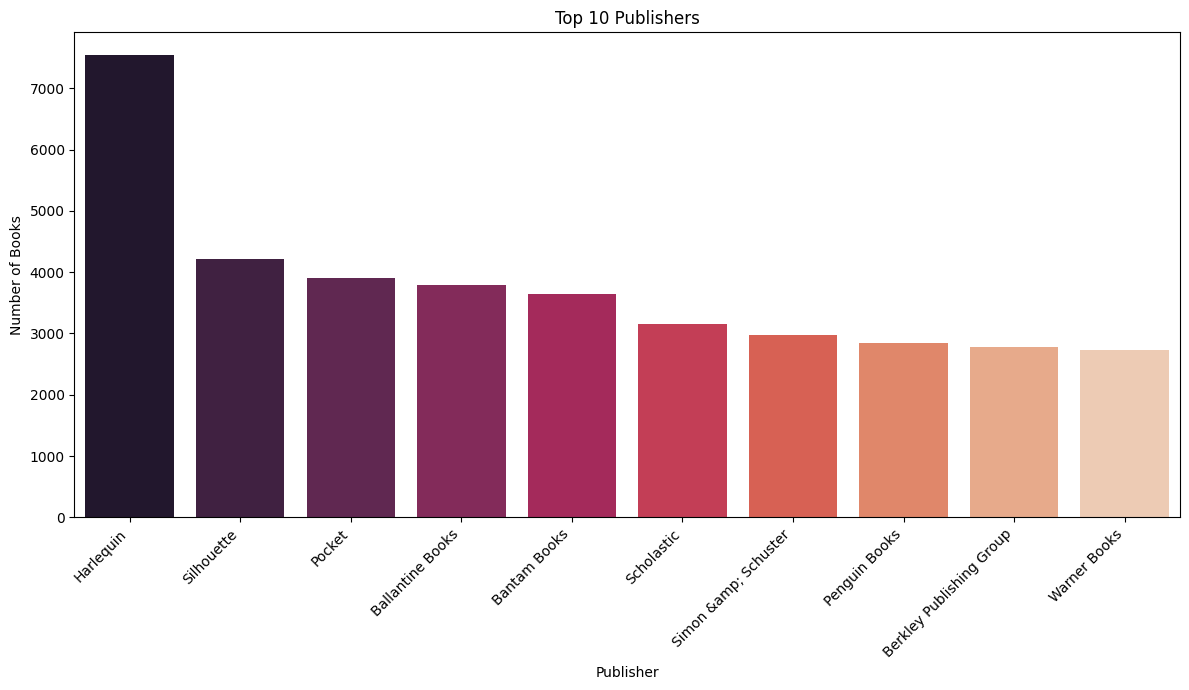

In [ ]:
# Here that bar plot shows that which user publish how many books
plt.figure(figsize=(12, 7))
sns.barplot(x=df_books['Publisher'].value_counts().head(10).index,
            y=df_books['Publisher'].value_counts().head(10).values,
            palette='rocket')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 6. SAVE CLEANED BOOK DATA

df_books.to_csv("cleaned_books.csv", index=False)
print("\nCleaned books saved as: cleaned_books.csv")



Cleaned books saved as: cleaned_books.csv


In [ ]:
df_clean_books = pd.read_csv(r"/content/cleaned_books.csv")
df_clean_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book_Age,Author_Popularity,Title_Clean_Lower
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,23.0,0,classical mythology
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,24.0,0,clara callan
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,34.0,0,decision in normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,26.0,0,flu: the story of the great influenza pandemic...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,26.0,0,the mummies of urumchi
...,...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,37.0,0,there's a bat in bunk five
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,34.0,0,from one to one hundred
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,21.0,0,lily dale : the true story of the town that ta...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,29.0,0,republic (world's classics)


# **Merging Dataset**

In [ ]:
# Load cleaned datasets
ratings = pd.read_csv(r"/content/cleaned_ratings.csv")
users   = pd.read_csv(r"/content/cleaned_user.csv")
books   = pd.read_csv(r"/content/cleaned_books.csv", encoding="latin-1")

In [ ]:
# Check shapes
print("Ratings:", ratings.shape)
print("Users:", users.shape)
print("Books:", books.shape)

Ratings: (761774, 4)
Users: (278858, 7)
Books: (271360, 11)


In [ ]:
# MERGE RATINGS + USERS

ratings_users = pd.merge(
    ratings,
    users,
    on="User-ID",
    how="left"      # keep all ratings
)

print("After merging Users:", ratings_users.shape)

After merging Users: (761774, 10)


In [ ]:
# MERGE WITH BOOKS

master = pd.merge(
    ratings_users,
    books,
    on="ISBN",
    how="left"     # keep all ratings
)

print("After merging Books:", master.shape)

After merging Books: (761774, 20)


In [ ]:
print("\nMissing Values After Merge:\n", master.isnull().sum())


Missing Values After Merge:
 User-ID                    0
ISBN                       0
Book-Rating                0
implicit_rating            0
Location                   0
Age                        0
City                   14111
State                  33699
Country                30931
Age_Group                  0
Book-Title             36135
Book-Author            36135
Year-Of-Publication    36135
Publisher              36135
Image-URL-S            36135
Image-URL-M            36135
Image-URL-L            36135
Book_Age               36135
Author_Popularity      36135
Title_Clean_Lower      36135
dtype: int64


In [ ]:
# USER LOCATION

master['City'] = master['City'].fillna("Unknown")
master['State'] = master['State'].fillna("Unknown")
master['Country'] = master['Country'].fillna("Unknown")

In [ ]:
# DROP invalid books (NO METADATA)

master = master.dropna(subset=["Book-Title"])

In [ ]:
# FILL Book Metadata (remaining)

master['Book-Author'] = master['Book-Author'].fillna("Unknown Author")
master['Publisher'] = master['Publisher'].fillna("Unknown Publisher")

In [ ]:
master['Year-Of-Publication'] = master['Year-Of-Publication'].fillna(
    master['Year-Of-Publication'].median()
)

In [ ]:
# Recalculate Book Age
master['Book_Age'] = 2025 - master['Year-Of-Publication']

In [ ]:
print("\nMissing Values After Merge:\n", master.isnull().sum())


Missing Values After Merge:
 User-ID                0
ISBN                   0
Book-Rating            0
implicit_rating        0
Location               0
Age                    0
City                   0
State                  0
Country                0
Age_Group              0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Book_Age               0
Author_Popularity      0
Title_Clean_Lower      0
dtype: int64


In [ ]:
master.shape

(725639, 20)

In [ ]:
author_popularity = master.groupby("Book-Author")['Book-Rating'].count()
master["Author_Popularity"] = master['Book-Author'].map(author_popularity)

In [ ]:
master

,User-ID,ISBN,Book-Rating,implicit_rating,Location,Age,City,State,Country,Age_Group,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book_Age,Author_Popularity,Title_Clean_Lower
0,276746,0425115801,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,29.0,4019,lightning
1,276746,0449006522,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,23.0,203,manhattan hunt club
2,276746,0553561618,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Dark Paradise,TAMI HOAG,1994.0,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,31.0,1248,dark paradise
3,276746,055356451X,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Night Sins,TAMI HOAG,1995.0,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,30.0,1248,night sins
4,276746,0786013990,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,At the Edge,David Dun,2002.0,Pinnacle Books,http://images.amazon.com/images/P/0786013990.0...,http://images.amazon.com/images/P/0786013990.0...,http://images.amazon.com/images/P/0786013990.0...,23.0,20,at the edge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761769,276704,059032120X,0,0,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,Sarah Bishop,Scott Odell,1996.0,Scholastic Inc,http://images.amazon.com/images/P/059032120X.0...,http://images.amazon.com/images/P/059032120X.0...,http://images.amazon.com/images/P/059032120X.0...,29.0,3,sarah bishop
761770,276704,0743211383,7,1,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,Dreamcatcher,Stephen King,2001.0,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,24.0,9095,dreamcatcher
761771,276704,080410526X,0,0,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,All I Really Need to Know,ROBERT FULGHUM,1989.0,Ivy Books,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...,36.0,237,all i really need to know
761772,276704,0876044011,0,0,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,27.0,3,edgar cayce on the akashic records: the book o...


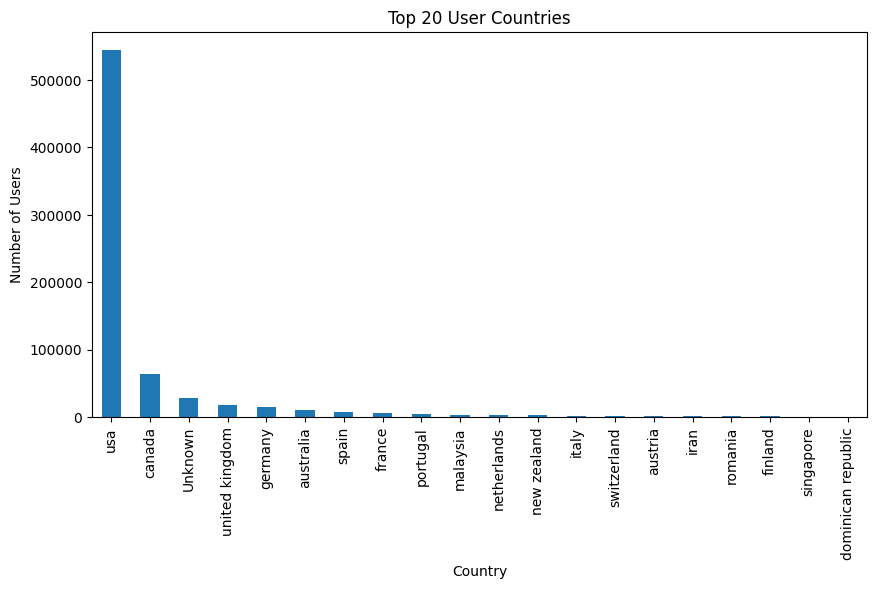

In [ ]:
# User Country Distribution (Top 20 Countries)
# Understand where most users come from.

master['Country'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title("Top 20 User Countries")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.show()

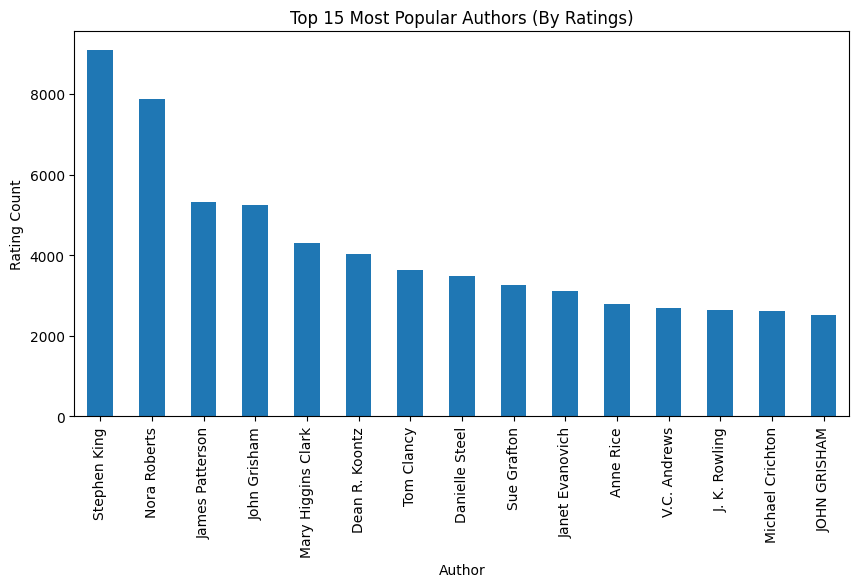

In [ ]:
# Author Popularity Visualization
# Helps determine which authors are most popular.

master.groupby("Book-Author")['Book-Rating'].count()\
      .sort_values(ascending=False).head(15)\
      .plot(kind='bar', figsize=(10,5))

plt.title("Top 15 Most Popular Authors (By Ratings)")
plt.xlabel("Author")
plt.ylabel("Rating Count")
plt.show()


In [ ]:
master.to_csv("final_merged_data.csv", index=False)
print("\nCleaned users saved as: final_merged_data.csv")


Cleaned users saved as: final_merged_data.csv


In [ ]:
df_final = pd.read_csv(r"/content/final_merged_data.csv")
df_final

,User-ID,ISBN,Book-Rating,implicit_rating,Location,Age,City,State,Country,Age_Group,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book_Age,Author_Popularity,Title_Clean_Lower
0,276746,0425115801,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,29.0,4019,lightning
1,276746,0449006522,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,23.0,203,manhattan hunt club
2,276746,0553561618,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Dark Paradise,TAMI HOAG,1994.0,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,31.0,1248,dark paradise
3,276746,055356451X,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,Night Sins,TAMI HOAG,1995.0,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,30.0,1248,night sins
4,276746,0786013990,0,0,"fort worth, ,",32.0,fort worth,Unknown,Unknown,Middled-aged,At the Edge,David Dun,2002.0,Pinnacle Books,http://images.amazon.com/images/P/0786013990.0...,http://images.amazon.com/images/P/0786013990.0...,http://images.amazon.com/images/P/0786013990.0...,23.0,20,at the edge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725634,276704,059032120X,0,0,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,Sarah Bishop,Scott Odell,1996.0,Scholastic Inc,http://images.amazon.com/images/P/059032120X.0...,http://images.amazon.com/images/P/059032120X.0...,http://images.amazon.com/images/P/059032120X.0...,29.0,3,sarah bishop
725635,276704,0743211383,7,1,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,Dreamcatcher,Stephen King,2001.0,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,24.0,9095,dreamcatcher
725636,276704,080410526X,0,0,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,All I Really Need to Know,ROBERT FULGHUM,1989.0,Ivy Books,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...,36.0,237,all i really need to know
725637,276704,0876044011,0,0,"cedar park, texas, usa",32.0,cedar park,texas,usa,Middled-aged,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,27.0,3,edgar cayce on the akashic records: the book o...
